In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [36]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


### Data Cleaning

In [38]:
# Check for missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [39]:
df.loc[:123, 'Region'] = 0
df.loc[123:, 'Region'] = 1
df['Region'] = df['Region'].astype(int)

In [40]:
# remove the null values
df = df.dropna().reset_index(drop = True)
df = df.drop(122).reset_index(drop = True)

In [41]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
13,14,6,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire,0
56,27,7,2012,36,48,13,0,90.3,22.2,108.5,8.7,29.4,15.3,fire,0
113,22,9,2012,31,50,19,0.6,77.8,10.6,41.4,2.4,12.9,2.8,not fire,0
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
146,25,6,2012,34,70,16,0,86,12.8,25.6,5.4,12.7,6.7,fire,1
87,27,8,2012,33,82,21,0,84.9,47,200.2,4.4,59.3,13.2,fire,0
99,8,9,2012,30,73,17,0.9,62,2.6,8.4,1.1,3,0.4,not fire,0
69,9,8,2012,35,59,17,0,87.4,14.8,57,6.9,17.9,9.9,fire,0
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
11,12,6,2012,26,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire,0


In [42]:
# Fix the spaces in columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [43]:
df.columns = df.columns.str.strip()

In [44]:
# Change the datatype of the required columns
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] .astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


### EDA

In [46]:
# Drop columns day, month, year
df.drop(columns = ['day', 'month', 'year'], axis = 1, inplace = True)

In [47]:
# Encode the categorical columns
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [48]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

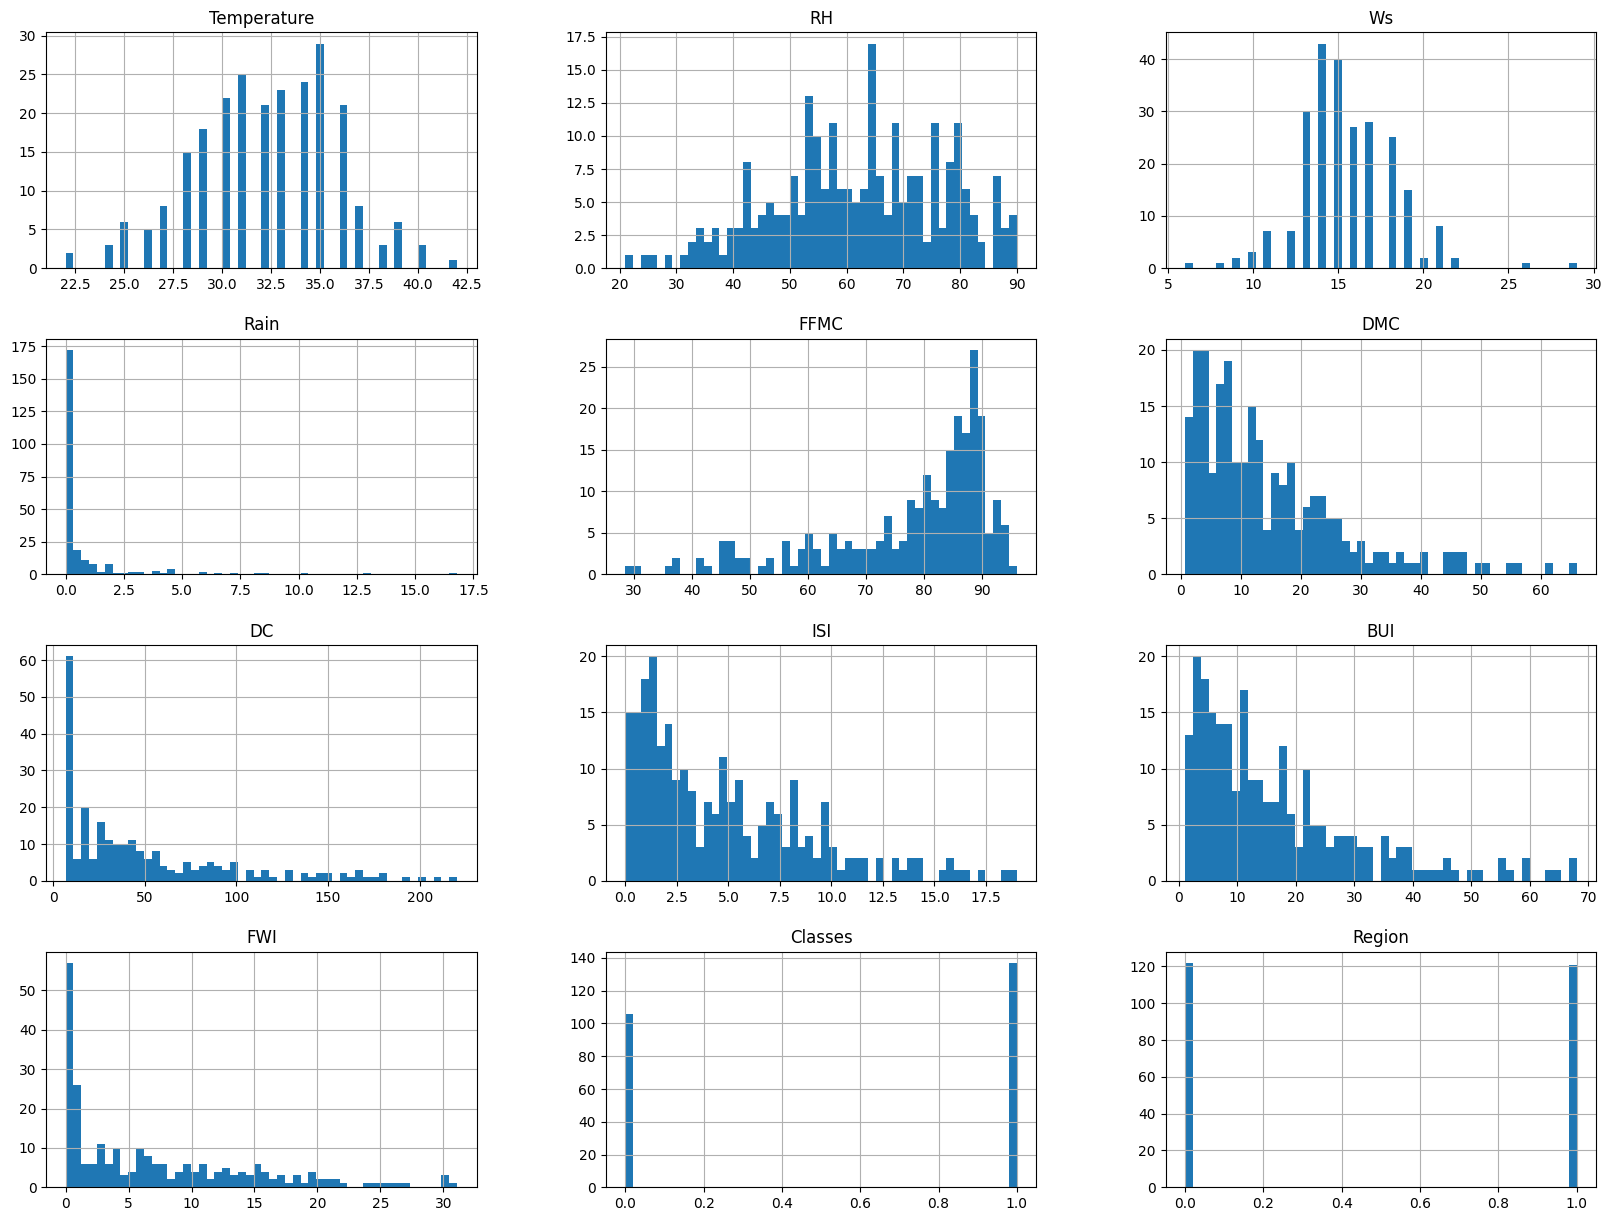

In [49]:
# Visualisation
df.hist(bins=50, figsize = (20, 15))
plt.show()

In [50]:
# Check correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

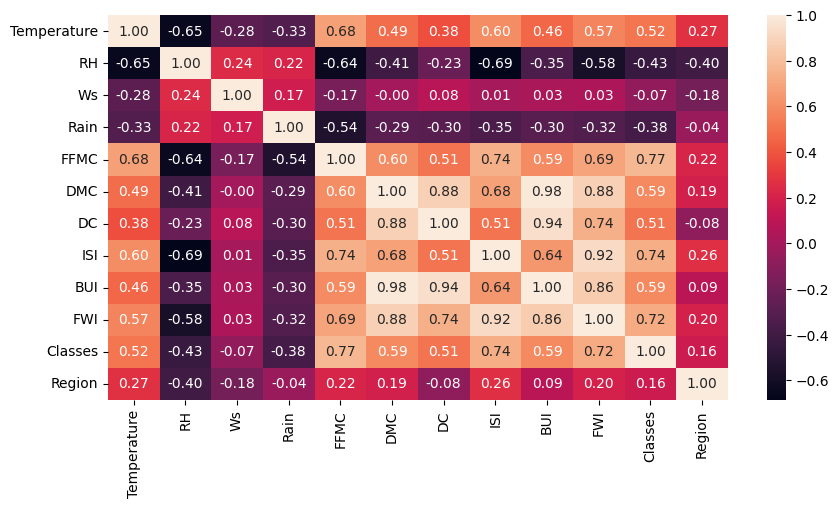

In [51]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')

In [52]:
# Independent and Dependent Features
X = df.drop(columns=['FWI'], axis = 1)
y = df['FWI']

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [55]:
# Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

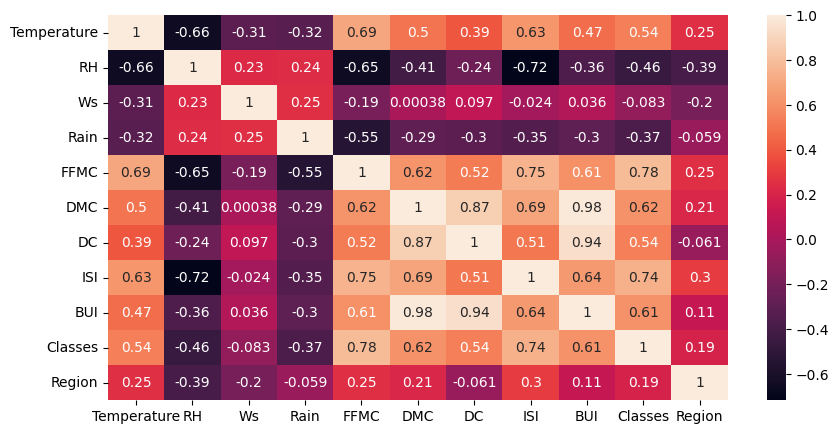

In [56]:
# Check for Multicollinearity
plt.figure(figsize = (10, 5))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [57]:
# Function to check the columns having correlation greater than the threshold
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [58]:
# threshold
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [59]:
# Drop features having correlation greater than threshold
X_train.drop(corr_features, axis = 1, inplace=True)
X_test.drop(corr_features, axis = 1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Standardisation

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: >

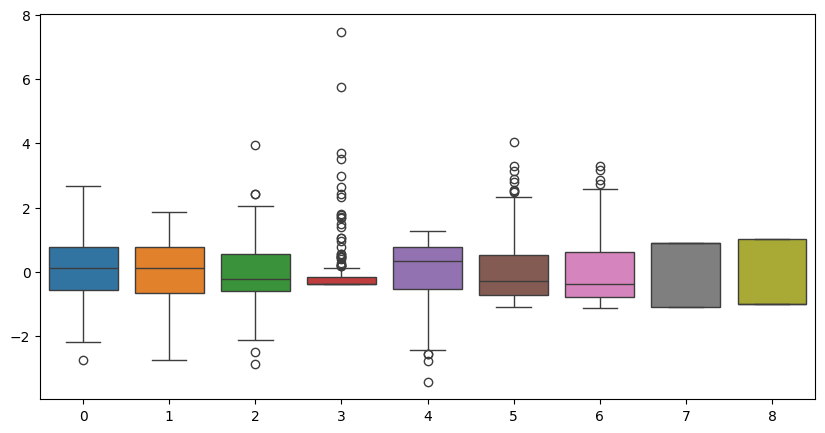

In [62]:
plt.figure(figsize = (10, 5))
sns.boxplot(X_train)

### Model Training

MAE: 0.5642305340105715
R2_Score: 0.9842993364555512


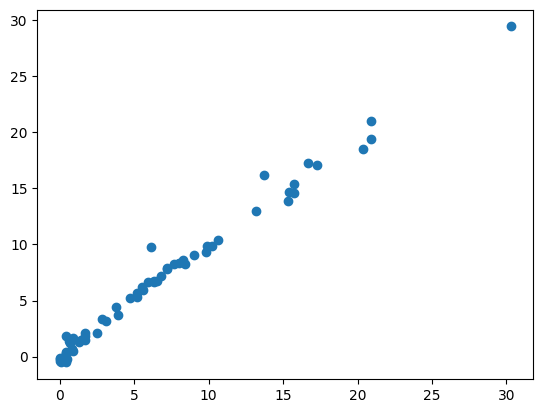

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_ridge)
score = r2_score(y_test, y_pred_ridge)
print("MAE:", mae)
print("R2_Score:", score)
plt.scatter(y_test, y_pred_ridge)

### Pickle

In [64]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))